In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

C:\Users\vikiv\AppData\Local\Temp\ipykernel_20772\3407078690.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [17]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [18]:
df=df.drop(['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'], axis=1)       # we can delete columns that we dont need
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Years of service, n=80')

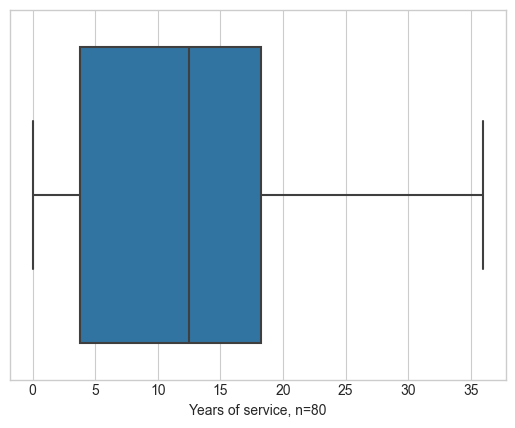

In [19]:
ax3 = sns.boxplot(x = df['years_of_service'])

ax3.set_xlabel('Years of service, n=' + str(df['years_of_service'].count()))

In [20]:
df1=pd.crosstab(df['education'], 'Count')
df1

col_0,Count
education,
1.0,27
2.0,30
3.0,22
4.0,2


In [21]:
df1.index=['Primary school','Secondary school graduate','Bachelor level','Master level']
df1.columns.name=''
df1

,Count
Primary school,27
Secondary school graduate,30
Bachelor level,22
Master level,2


Text(0.5, 0, 'Count, N=102')

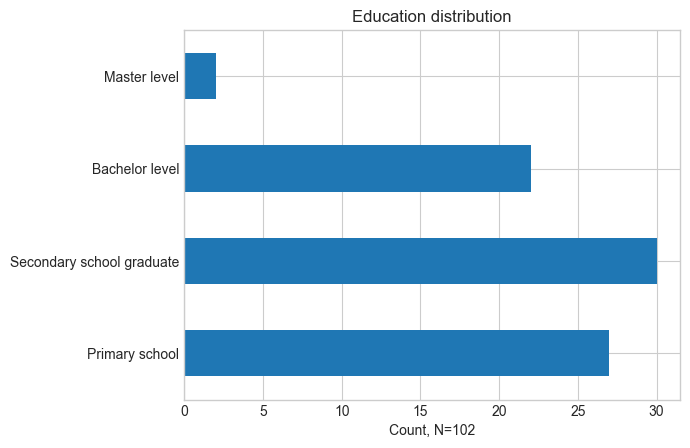

In [22]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

In [23]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index=['Primary school','Secondary school graduate','Bachelor level','Master level']
df2.columns.name=''
df2

,Count,%
Primary school,27,33.333333
Secondary school graduate,30,37.037037
Bachelor level,22,27.160494
Master level,2,2.469136


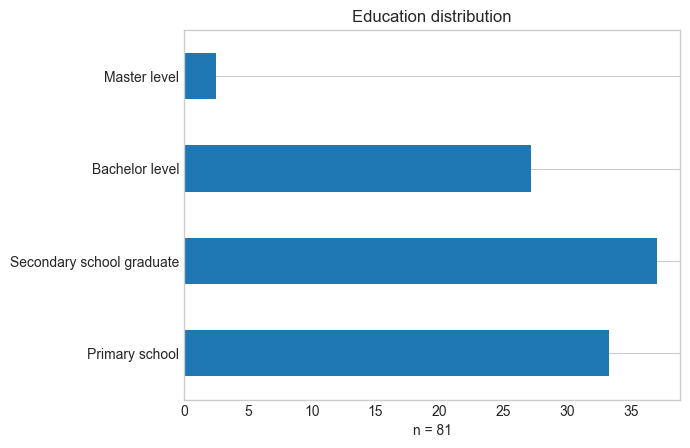

In [24]:
df2['%'].plot.barh(zorder = 2)
plt.title('Education distribution')
plt.xlabel('n = ' + str(df2['Count'].sum()))
plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

# the quantitive measures and codes are for YEARS OF SERVICE 

In [25]:
bins = [0, 10, 20, 30, 40]

In [26]:
df['years_of_service'] = pd.cut(df['years_of_service'], bins = bins)
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,"(20.0, 30.0]",3587,3,3.0,3,3,3
1,1,29,2,2.0,"(0.0, 10.0]",2963,1,5.0,2,1,3
2,1,30,1,1.0,"(0.0, 10.0]",1989,3,4.0,1,1,3
3,1,36,2,1.0,"(10.0, 20.0]",2144,3,3.0,3,3,3
4,1,24,1,2.0,"(0.0, 10.0]",2183,2,3.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,NaN,1598,4,4.0,4,3,4
78,1,33,1,1.0,"(0.0, 10.0]",1638,1,3.0,2,1,2
79,1,27,1,2.0,"(0.0, 10.0]",2612,3,4.0,3,3,3
80,1,35,2,2.0,"(10.0, 20.0]",2808,3,4.0,3,3,3


In [27]:
df1=pd.crosstab(df['years_of_service'], 'Count')
df1

col_0,Count
years_of_service,
"(0, 10]",34
"(10, 20]",26
"(20, 30]",14
"(30, 40]",2


In [28]:
df1.index = df1.index.astype(str)
df1.loc['Total'] = df1.sum()
df1

col_0,Count
years_of_service,
"(0, 10]",34
"(10, 20]",26
"(20, 30]",14
"(30, 40]",2
Total,76


In [29]:
# Finalizing the layout
df1.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

col_0,Count
years_of_service,
"(0, 10]",34
"(10, 20]",26
"(20, 30]",14
"(30, 40]",2
Total,76


NameError: name 'n' is not defined

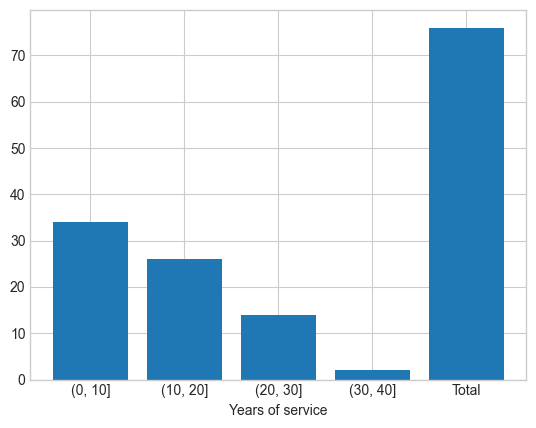

In [30]:
df1_reset = df1.reset_index()

# Extract the 'years_of_service' column for the histogram
years_of_service = df1_reset['years_of_service']
# Extract the 'Count' column as the data for the bar heights
counts = df1_reset['Count']

plt.bar(years_of_service, counts)
plt.xlabel('Years of service')
plt.ylabel('Count, n=' + str(n))

# Present the results (education and years_of_service) of the cross tabulations in tables and graphically

In [31]:
df3 = pd.crosstab(df['education'], df['years_of_service'])
df3.index = ['Primary school','Secondary school graduate','Bachelor level','Master level']
df3

years_of_service,"(0, 10]","(10, 20]","(20, 30]","(30, 40]"
Primary school,8,10,6,1
Secondary school graduate,17,7,4,1
Bachelor level,7,9,4,0
Master level,2,0,0,0


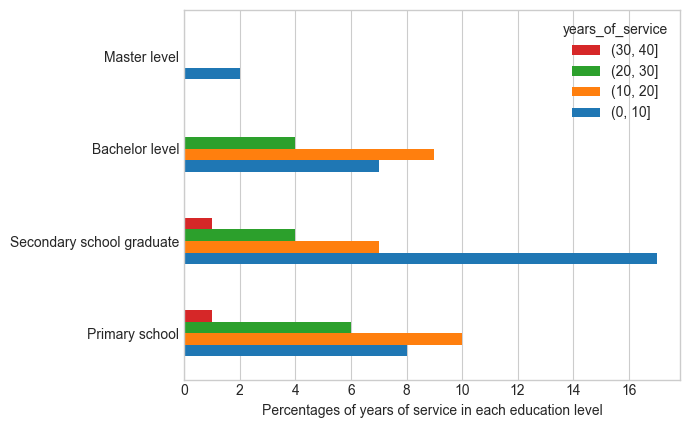

In [32]:
df3.plot.barh(legend = 'reverse')

plt.xlabel('Percentages of years of service in each education level')

plt.grid(axis = 'y')

# ...

In [33]:
df4 = pd.crosstab(df['sat_workingEnvironment'], 'Count') 

df4.index=['1', '2', '3', '4', '5']
df4.columns.name = ''
df4 

,Count
1,9
2,9
3,30
4,23
5,11


In [34]:
sum(df4['Count'])


82

Text(0.5, 0, 'Count, N=82')

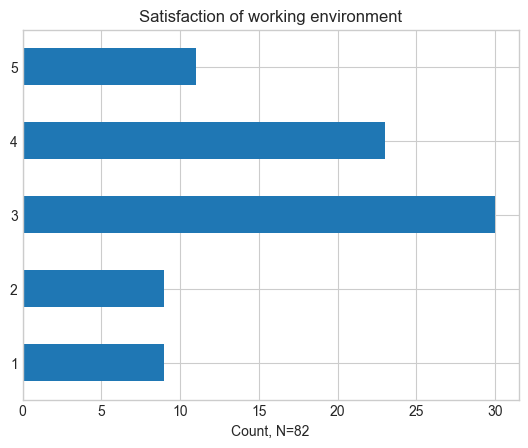

In [35]:
df4.plot.barh(legend = False)
plt.title('Satisfaction of working environment')
plt.xlabel('Count, N=82')

In [36]:
df5 = pd.crosstab(df['years_of_service'], df['sat_workingEnvironment']) 
df5.index = ['[0, 10]', '[10, 20]', '[20, 30]', '[30, 40]']
df5

sat_workingEnvironment,1,2,3,4,5
"[0, 10]",2,7,15,7,3
"[10, 20]",5,0,5,9,7
"[20, 30]",0,1,7,5,1
"[30, 40]",0,1,0,1,0


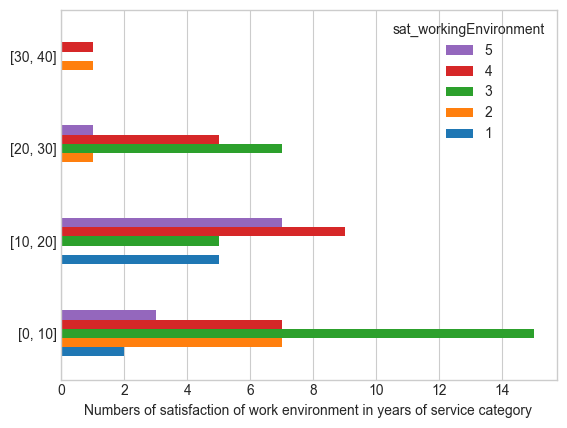

In [37]:
df5.plot.barh(legend = 'reverse')

plt.xlabel('Numbers of satisfaction of work environment in years of service category ')

plt.grid(axis = 'y')

In [38]:
from scipy.stats import chi2_contingency


chi2_contingency(df5) 

Chi2ContingencyResult(statistic=22.878372172489822, pvalue=0.028776450598999127, dof=12, expected_freq=array([[ 3.13157895,  4.02631579, 12.07894737,  9.84210526,  4.92105263],
       [ 2.39473684,  3.07894737,  9.23684211,  7.52631579,  3.76315789],
       [ 1.28947368,  1.65789474,  4.97368421,  4.05263158,  2.02631579],
       [ 0.18421053,  0.23684211,  0.71052632,  0.57894737,  0.28947368]]))